## 1. Implement Matrix Factorization using numpy (70 points)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0 )

In [2]:
def matrix_factorization(A, K, steps, alpha, beta):

    """
    A: user-item rating matrix
    K:  
    steps: number of iterations to perform the optimization
    alpha: learning rate
    beta: regularization parameter
    """
    
    #Initialize factor matrices
    m, n = A.shape

    #list of erros
    errors=[]
   
    C=np.random.randn(m,K)
    U=np.random.randn(K,n)

   
    for step in range(steps):
        error = np.sqrt(np.sum((A-np.dot(C,U))**2))
        errors.append(error)
        E=A-np.dot(C,U)
        C += alpha * (2*E @ U.T - beta * C)
        U += alpha * (C.T @ (2 * E) - beta * U)
    
    return C, U, errors

In [3]:
# show the results of A
steps = 1000
k = 2
alpha = 0.01
beta = 0.01

A = np.array([[5, 3, 0, 1],
              [4, 0, 0, 1],
              [1, 1, 0, 5],
              [1, 0, 0, 4],
              [0, 1, 5, 4]])
C, U, errors = matrix_factorization(A, K=k, steps=steps, alpha=alpha, beta=beta)
print(C)
print(U)
print(errors)

[[ 1.0925882   2.0352902 ]
 [ 0.74953957  1.35092518]
 [ 1.77644235 -0.15386255]
 [ 1.38001644 -0.13332437]
 [ 2.09306573 -1.33924359]]
[[ 1.04129973  0.63928281  0.93231044  2.19647358]
 [ 1.96176299  0.59273743 -0.85463868 -0.41233333]]
[11.689671125779554, 10.50846099686758, 9.649524176416001, 8.96989739171278, 8.425814230453632, 8.001968747580733, 7.684678081730131, 7.454520383068227, 7.289017542799793, 7.167610218781646, 7.074511839433981, 6.998962006210498, 6.934146520710237, 6.875904105953834, 6.821706959305218, 6.769987284182398, 6.719731323788057, 6.670246164060671, 6.621028869298155, 6.571693741865443, 6.521932061155445, 6.471489961762185, 6.420156533483496, 6.367757757526758, 6.314153809432945, 6.259238295237055, 6.202938548272628, 6.145216419184102, 6.086069160108859, 6.0255301009886315, 5.9636688781422516, 5.9005910233308825, 5.836436767196911, 5.77137896009315, 5.705620067983478, 5.639388260476127, 5.572932669221779, 5.506517953541837, 5.44041836127609, 5.374911511649339,



## 2. Plot the error of SGD (10 points)

Text(0, 0.5, 'error')

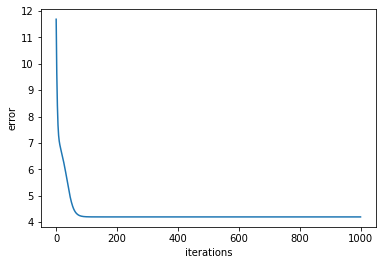

In [4]:
plt.plot(errors)
plt.xlabel('iterations')
plt.ylabel('error')



## 3. Compare the results with NMF from sklearn (10 points)

In [5]:

from sklearn.decomposition import NMF

n_components = 3

model_NMF = NMF(n_components=n_components,init='nndsvda', max_iter=steps, random_state=0, alpha_H=beta, alpha_W=beta, tol=alpha  )

W=model_NMF.fit_transform(A)
H=model_NMF.n_components_


print(f"W: {W}\n H: {H}")

W: [[2.06665057e-07 1.44054570e+00 0.00000000e+00]
 [0.00000000e+00 9.59292906e-01 0.00000000e+00]
 [2.77953592e-07 3.52229460e-01 1.53049891e+00]
 [1.20154892e-08 2.62466269e-01 1.19891512e+00]
 [0.00000000e+00 0.00000000e+00 2.20171614e+00]]
 H: 3


## 4. Explain the differences and why (10 points)

In [13]:
cur_errors = []
nmf_errors = []

for i in range(5, steps):
    model_NMF = NMF(n_components=n_components,init='nndsvda', max_iter=i, random_state=0, alpha_H=beta, alpha_W=beta, tol=alpha  )
    W=model_NMF.fit_transform(A)
    nmf_errors.append(model_NMF.reconstruction_err_)
    C, U, errors = matrix_factorization(A, K=k, steps=steps, alpha=alpha, beta=beta)
    cur_errors.append(np.mean(errors))

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 5 reached. Increase it to improve convergence.
  warnings.warn(


Last CUR error: 4.547750289515006
Minimum CUR error: 4.227778978143915


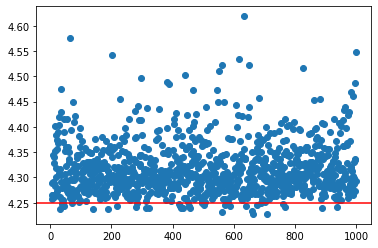

In [20]:
plt.scatter(list(range(5, steps)), cur_errors)
plt.axhline(y=4.25, color='red')
print("Last CUR error:", cur_errors[-1])
print("Minimum CUR error:", np.min(cur_errors))

Last NMF error: 4.27845569624108
Minimum NMR erorr: 4.27845569624108


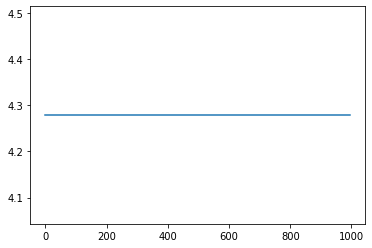

In [21]:
plt.plot(nmf_errors)
print("Last NMF error:", nmf_errors[-1])
print("Minimum NMR erorr:", np.min(nmf_errors))

As we can see the NMF model converge very quickly and but we get the explainability with it. CUR model performed the best with minimum error of 4.22777 where NMF's minimum error is 4.27845. If we tune hyperparameters we might get much less error from CUR.

NMF doesn't take negative values into account and the sparse matrix is very useful for feature extraction and analysis while CUR decomposition is not.

